In [16]:
# Conventionally people rename these common imports for brevity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Magic command to make the plots appear in-line (it's actually called a "magic command")
%matplotlib inline

use a parameter called `random_state` to control the randomness in loading the data so you don't get wildly different results than us just to how the data is sampled.

In [17]:
sales = pd.read_csv('home_data.csv') 

# Selects 1% of the data
sales = sales.sample(frac=0.01, random_state=0) 

print(f'Number of points: {len(sales)}')
sales.head()

Number of points: 216


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17384,1453602313,20141029T000000,297000,2,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
722,2225059214,20140808T000000,1578000,4,3.25,4670,51836,2.0,0,0,...,12,4670,0,1988,0,98005,47.6350,-122.164,4230,41075
2680,2768000270,20140625T000000,562100,2,0.75,1440,3700,1.0,0,0,...,7,1200,240,1914,0,98107,47.6707,-122.364,1440,4300
18754,6819100040,20140624T000000,631500,2,1.00,1130,2640,1.0,0,0,...,8,1130,0,1927,0,98109,47.6438,-122.357,1680,3200
14554,4027700666,20150426T000000,780000,4,2.50,3180,9603,2.0,0,2,...,9,3180,0,2002,0,98155,47.7717,-122.277,2440,15261


### Feature Engineering


In [18]:
### edTest(test_feature_extraction) ###

from math import sqrt

# All of the features of interest
selected_inputs = [
    'bedrooms', 
    'bathrooms',
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'waterfront', 
    'view', 
    'condition', 
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built', 
    'yr_renovated'
]

# Compute the square and sqrt of each feature
all_features = []
for data_input in selected_inputs:
    square_feat = data_input + '_square'
    sqrt_feat = data_input + '_sqrt'
    
    # TODO compute the square and square root as two new features
    
    # 1) find the position of data_input as data_input_pos
    data_input_pos = sales.columns.get_loc(data_input)

    # 2) insert square_feat and sqrt_feat at data_input_pos + 1 and data_input_pos + 2, respectively
    square_feat_pos = data_input_pos + 1
    sqrt_feat_pos = data_input_pos + 2
    square_feat_values = []
    sqrt_feat_values = []
    
    # 3) append the value of square_feat and sqrt_feat for each row
    for index, row in sales.iterrows():
         square_feat_values.append(row[data_input] * row[data_input])
         sqrt_feat_values.append(sqrt(row[data_input]))

    sales.insert(square_feat_pos, square_feat, square_feat_values)
    sales.insert(sqrt_feat_pos, sqrt_feat, sqrt_feat_values)

    all_features.extend([data_input, square_feat, sqrt_feat])


# Split the data into features and price
price = sales['price']
sales = sales[all_features]

sales.head()


,bedrooms,bedrooms_square,bedrooms_sqrt,bathrooms,bathrooms_square,bathrooms_sqrt,sqft_living,sqft_living_square,sqft_living_sqrt,sqft_lot,...,sqft_above_sqrt,sqft_basement,sqft_basement_square,sqft_basement_sqrt,yr_built,yr_built_square,yr_built_sqrt,yr_renovated,yr_renovated_square,yr_renovated_sqrt
17384,2,4,1.414214,1.50,2.2500,1.224745,1430,2044900,37.815341,1650,...,37.815341,0,0,0.000000,1999,3996001,44.710178,0,0,0.0
722,4,16,2.000000,3.25,10.5625,1.802776,4670,21808900,68.337398,51836,...,68.337398,0,0,0.000000,1988,3952144,44.586994,0,0,0.0
2680,2,4,1.414214,0.75,0.5625,0.866025,1440,2073600,37.947332,3700,...,34.641016,240,57600,15.491933,1914,3663396,43.749286,0,0,0.0
18754,2,4,1.414214,1.00,1.0000,1.000000,1130,1276900,33.615473,2640,...,33.615473,0,0,0.000000,1927,3713329,43.897608,0,0,0.0
14554,4,16,2.000000,2.50,6.2500,1.581139,3180,10112400,56.391489,9603,...,56.391489,0,0,0.000000,2002,4008004,44.743715,0,0,0.0


### Split Data


In [19]:
### edTest(test_data_splitting) ###

# TODO Fill in the numbers to make datasets of the right size.
from sklearn.model_selection import train_test_split

train_and_validation_sales, test_sales, train_and_validation_price, test_price = \
    train_test_split(sales, price, test_size=0.2, random_state=6)
train_sales, validation_sales, train_price, validation_price = \
    train_test_split(train_and_validation_sales, train_and_validation_price, test_size=0.125, random_state=6)


### Standardization

In [20]:
### edTest(test_standardization) ###

# TODO preprocess the training, validation, and test data

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_sales)
scaler.mean_
scaler.scale_
train_sales = scaler.transform(train_sales)
validation_sales = scaler.transform(validation_sales)
test_sales = scaler.transform(test_sales)


### Linear Regression 


As a baseline, we will first, train a regular `LinearRegression` model on the data using the features in `all_features` and report its **test RMSE**. Write the code in the cell below to calculate the answer. Save your result in a variable named `test_rmse`.


In [21]:
### edTest(test_train_linear_regression) ###

# TODO Train a linear regression model (you'll likely need to import some things)

import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
model=regressor.fit(train_sales, train_price)

test_pred = model.predict(test_sales)
test_rmse = np.sqrt(metrics.mean_squared_error(test_price, test_pred))
print(test_rmse)



384955.79936446896


--- 
### Ridge Regression
At this point, you might be looking forward at the homework and seeing how long it is! We want to provide a lot of instruction so you aren't left completely in the dark on what to do, but we are also trying to avoid just giving you a bunch of starter code and just having you fill in the blanks. This section is very long because it tries to give really detailed instructions on what to compute. The next section on LASSO has almost exactly the same steps so it will be a lot easier doing that part of the assignment!

In this section, we will do some **hyper-parameter tuning** to find the optimal setting of the regularization constant $\lambda$ for Ridge Regression. Remember that $\lambda$ is the coefficient that controls how much the model is penalized for having large weights in the optimization function.

$$\hat{w}_{ridge} = \min_w RSS(w) + \lambda \left\lVert w \right\rVert_2^2$$

where $\left\lVert w \right\rVert_2^2 = \sum_{j=0}^D w_j^2$ is the $l_2$-norm of the parameters. By default, `sklearn`'s `Ridge` class does not regularize the intercept.

### Train Ridge Models
For this part of the assignment, you will be writing code to find the optimal setting of the penalty $\lambda$. Below, we describe what steps you will want to have in your code to compute these values:

*Implementation Details*
* Use the following choices of $l_2$ penalty: $[10^{-5}, 10^{-4}, ..., 10^4, 10^5]$. In Python, you can create a list of these numbers using `np.logspace(-5, 5, 11, base=10)`. 
* Use the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class from sklearn to train a Ridge Regression model on the **training** data. The **only** parameters you need to pass when constructing the Ridge model are `alpha`, which lets you specify what you want the $l_2$ penalty to be, and `random_state=0` to avoid randomness.
* Evaluate both the training error and the validation error for the model by reporting the RMSE of each dataset.
* **Put all of your results in a pandas `DataFrame` named `ridge_data`** so you can analyze them later. The `ridge_data` should have a row for each $l_2$ penalty you tried and should have the following columns:
  * `l_2_penalty`: The $l_2$ penalty for that row
  * `model`: The actual `Ridge` model object that was trained with that $l_2$ penalty
  * `train_rmse`: The training RMSE for that model
  * `validation_rmse`: The validation RMSE for that model
* To build up this `DataFrame`, we recommend first building up a list of dictionary objects and then converting that to a `DataFrame`. For example, the following code would produce the following `pandas.DataFrame`.
```python
data = []
for i in range(3):
    data.append({
        'col_a': i,
        'col_b': 2 * i
    }
data_frame = pd.DataFrame(data)
```

| col_a | col_b | 
|-------|-------|
|   0   |   0   | 
|   1   |   2   | 
|   2   |   4   |

*Hints: Here is a development strategy that you might find helpful*
* You will need a loop to loop over the possible $l_2$ penalties. Try writing the code without a loop first with just one setting of $\lambda$. Try writing a lot of the code without a loop first if you're stuck to help you figure out how the pieces go together. You can safely ignore building up the result `DataFrame` at first, just print all the information out to start! 
* If you are running into troubles writing your loop, try to print values out to investigate what's going wrong.
* Remember to use RMSE for calculating the error!


In [22]:
### edTest(test_ridge) ###

# TODO Implement code to evaluate Ridge Regression with various l2 Penalties


import numpy as np
from sklearn.linear_model import Ridge
from sklearn import metrics

data = []

l2_penalties = np.logspace(-5, 5, 11, base=10)
for l2_penalty in l2_penalties:
  train_model = Ridge(l2_penalty, random_state=0)
  train_model.fit(train_sales, train_price)
  train_pred = train_model.predict(train_sales)
  train_rmse = np.sqrt(metrics.mean_squared_error(train_price, train_pred))

  validation_pred = train_model.predict(validation_sales)
  validation_rmse = np.sqrt(metrics.mean_squared_error(validation_price, validation_pred))
  data.append({
      'l2_penalty': l2_penalty,
      'model': train_model,
      'train_rmse': train_rmse,
      'validation_rmse': validation_rmse,
  })

ridge_data = pd.DataFrame(data)

Next, let's investigate how the penalty affected the train and validation error by running the following plotting code. 

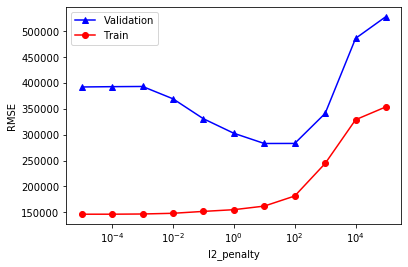

In [23]:
# Plot the validation RMSE as a blue line with dots
plt.plot(ridge_data['l2_penalty'], ridge_data['validation_rmse'], 
         'b-^', label='Validation')
# Plot the train RMSE as a red line dots
plt.plot(ridge_data['l2_penalty'], ridge_data['train_rmse'], 
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l2_penalty')
plt.ylabel('RMSE')
plt.legend()

Next, we want to actually look at which model we think will perform best. First we define a helper function that will be used to inspect the model parameters.

In [24]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(features, model.coef_))
    print(*feats, sep = "\n")

### Inspecting Coefficients


To do this in `pandas`, you'll need to use the `idxmin()` function to find the index of the smallest value in a column and the `loc` property to access that index. As an example, suppose we had a `DataFrame` named `df`:

| a | b | c |
|---|---|---|
| 1 | 2 | 3 |
| 2 | 1 | 3 |
| 3 | 2 | 1 |

If we wrote the code 
```python
index = df['b'].idxmin()
row = df.loc[index]
```

It would first find the index of the smallest value in the `b` column and then uses the `.loc` property of the `DataFrame` to access that particular row. It will return a `Series` object (basically a Python dictionary) which means you can use syntax like `row['a']` to access a particular column of that row.

In [25]:
### edTest(test_ridge_analysis) ###

# TODO Print information about best l2 model

idxmin = ridge_data['validation_rmse'].idxmin()
row = ridge_data.loc[idxmin]

best_l2 = row['l2_penalty']
print(best_l2)

train_model = Ridge(best_l2, random_state=0)
train_model.fit(train_sales, train_price)
train_pred = train_model.predict(test_sales)
test_rmse = np.sqrt(metrics.mean_squared_error(test_price, train_pred))

print_coefficients(train_model, all_features)

num_zero_coeffs_ridge = 0
for coe in list(zip(all_features, train_model.coef_)):
    if coe[1] == 0:
        num_zero_coeffs_ridge = num_zero_coeffs_ridge + 1

print(num_zero_coeffs_ridge)

10.0
('bedrooms', -12814.960695689757)
('bedrooms_square', -5578.585627553796)
('bedrooms_sqrt', -19987.878641088777)
('bathrooms', -261.23310460046054)
('bathrooms_square', 139717.20930550506)
('bathrooms_sqrt', -50659.47327155906)
('sqft_living', 23125.504167268835)
('sqft_living_square', 19304.655191207963)
('sqft_living_sqrt', 14413.319225996665)
('sqft_lot', 18909.076417532724)
('sqft_lot_square', 21375.201111502705)
('sqft_lot_sqrt', -25079.695226768945)
('floors', -15962.66404988111)
('floors_square', 13961.951626360486)
('floors_sqrt', -27220.383772045803)
('waterfront', 43800.1474977599)
('waterfront_square', 43800.14749776034)
('waterfront_sqrt', 43800.147497760285)
('view', -7513.023932352358)
('view_square', 11529.923304894024)
('view_sqrt', -12278.672850846053)
('condition', 4224.607744785538)
('condition_square', 4624.595688989807)
('condition_sqrt', 4026.4554446252228)
('grade', 44871.77670857436)
('grade_square', 73624.90237512377)
('grade_sqrt', 31314.95642392305)
('sq

--- 
### LASSO Regression
In this section you will do basically the exact same analysis you did with Ridge Regression, but using LASSO Regression instead. It's okay if your code for this section looks very similar to your code for the last section. 

Remember that for LASSO we choose the parameters that minimize this quality metric instead 

$$\hat{w}_{LASSO} = \min_w RSS(w) + \lambda \left\lVert w \right\rVert_1$$

where $\left\lVert w \right\rVert_1 = \sum_{j=0}^D \lVert w_j \rVert$ is the L1 norm of the parameter vector.

### Train LASSO Models
We will use the same set of instructions for LASSO as we did for Ridge, except for the following differences. Please refer back to the Ridge Regression instructions and your code to see how these differences fit in!

* Use the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) model. Like before, the only parameters you need to pass in are `alpha` for the L1 penalty and `random_state=0`.
* The range L1 penalties should be $[10, 10^2, ..., 10^7]$. In Python, this is `np.logspace(1, 7, 7, base=10)`.
* The result should be stored in a `DataFrame` named `lasso_data`. All the columns should have the same name and corresponding values except the penalty column should be called `l1_penalty`.
* It is okay if your code prints some `ConvergenceWarning` warnings, these should not impact your results!.

You do not need to worry about your code being redundant with the last section for this part.

In [26]:
### edTest(test_lasso) ###

# TODO Implement code to evaluate LASSO Regression with various L1 penalties

import numpy as np

from sklearn import metrics
from sklearn import linear_model


data_lasso = []

l1_penalties = np.logspace(1, 7, 7, base=10)
for l1_penalty in l1_penalties:
  train_model = linear_model.Lasso(l1_penalty, random_state=0)
  train_model.fit(train_sales, train_price)
  train_pred = train_model.predict(train_sales)
  train_rmse = np.sqrt(metrics.mean_squared_error(train_price, train_pred))

  validation_pred = train_model.predict(validation_sales)
  validation_rmse = np.sqrt(metrics.mean_squared_error(validation_price, validation_pred))
  data_lasso.append({
      'l1_penalty': l1_penalty,
      'model': train_model,
      'train_rmse': train_rmse,
      'validation_rmse': validation_rmse,
  })

lasso_data = pd.DataFrame(data_lasso)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1652622332201.121, tolerance: 1912867203.4052832
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1000006149477.815, tolerance: 1912867203.4052832
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2342567368.334961, tolerance: 1912867203.4052832
  positive)


Like before, let's look at how the L1 penalty affects the performance.

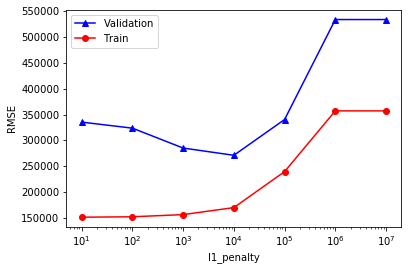

In [27]:
# Plot the validation RMSE as a blue line with dots

plt.plot(lasso_data['l1_penalty'], lasso_data['validation_rmse'],
         'b-^', label='Validation')

# Plot the train RMSE as a red line dots
plt.plot(lasso_data['l1_penalty'], lasso_data['train_rmse'],
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l1_penalty')
plt.ylabel('RMSE')
plt.legend()

### Inspecting Coefficients


In [28]:
### edTest(test_lasso_analysis) ###

# TODO Print information about best l1 model

from sklearn import linear_model

idxmin = lasso_data['validation_rmse'].idxmin()
row = lasso_data.loc[idxmin]

best_l1 = row['l1_penalty']

print(best_l1)

train_model = linear_model.Lasso(best_l1, random_state=0)
train_model.fit(train_sales, train_price)
train_pred = model.predict(test_sales)
test_rmse = np.sqrt(metrics.mean_squared_error(test_price, train_pred))

print_coefficients(train_model, all_features)

num_zero_coeffs_lasso = 0
for coe in list(zip(all_features, train_model.coef_)):
    if coe[1] == 0:
        num_zero_coeffs_lasso = num_zero_coeffs_lasso + 1

print(num_zero_coeffs_lasso)

10000.0
('bedrooms', -0.0)
('bedrooms_square', -0.0)
('bedrooms_sqrt', -19088.36032905744)
('bathrooms', -0.0)
('bathrooms_square', 108823.89843473864)
('bathrooms_sqrt', -0.0)
('sqft_living', 0.0)
('sqft_living_square', 0.0)
('sqft_living_sqrt', 0.0)
('sqft_lot', 0.0)
('sqft_lot_square', 7986.231414584601)
('sqft_lot_sqrt', 0.0)
('floors', -0.0)
('floors_square', -0.0)
('floors_sqrt', -12569.995812596218)
('waterfront', 124085.67950514512)
('waterfront_square', 0.0)
('waterfront_sqrt', 0.0)
('view', 0.0)
('view_square', 0.0)
('view_sqrt', -0.0)
('condition', 0.0)
('condition_square', 0.0)
('condition_sqrt', 0.0)
('grade', 0.0)
('grade_square', 147501.36528659248)
('grade_sqrt', 0.0)
('sqft_above', 0.0)
('sqft_above_square', 71224.80787057214)
('sqft_above_sqrt', 0.0)
('sqft_basement', 0.0)
('sqft_basement_square', -0.0)
('sqft_basement_sqrt', 0.0)
('yr_built', -63287.382821229934)
('yr_built_square', -0.0)
('yr_built_sqrt', -17250.36953619334)
('yr_renovated', 0.0)
('yr_renovated_squa

Let's look at which coefficients ended up having a 0 coefficient. In the cell below, we print the name of all features with coefficient 0. Note, we actually have to check if it is near 0 since numeric computations in Python sometimes yield slight rounding errors (e.g., how 1/3 is .333333333333 and that can't be represented precisely in a computer)

In [29]:
for feature, coef in zip(all_features, row['model'].coef_):
  if abs(coef) <= 10 ** -17:
    print(feature)

bedrooms
bedrooms_square
bathrooms
bathrooms_sqrt
sqft_living
sqft_living_square
sqft_living_sqrt
sqft_lot
sqft_lot_sqrt
floors
floors_square
waterfront_square
waterfront_sqrt
view
view_square
view_sqrt
condition
condition_square
condition_sqrt
grade
grade_sqrt
sqft_above
sqft_above_sqrt
sqft_basement
sqft_basement_square
sqft_basement_sqrt
yr_built_square
yr_renovated
yr_renovated_sqrt


> Copyright ©2021 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Spring Quarter 2021 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.

---